In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
import numpy as np
from sklearn.svm import OneClassSVM


In [ ]:
def features_por_posicao(posicao):
    if posicao == 'FW':
        return fw_features1
    elif posicao == 'MF':
        return mf_features1
    elif posicao == 'DF':
        return df_features1
    elif posicao == 'DFMF':
        return dfmf_features1
    elif posicao == 'MFDF':
        return mfdf_features1
    elif posicao == 'DFFW':
        return dffw_features1
    elif posicao == 'FWMF':
        return fwmf_features1
    elif posicao == 'FWDF':
        return fwdf_features1
    elif posicao == 'GK':
        return gk_features1
    elif posicao== 'MFFW':
      return mffw_features1
    else:
        return None


In [ ]:
# Features para filtro
fw_features1 = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis","PasTotCmp"]
mf_features1 = ["Goals","PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov", "Carries", "CarTotDist", "CarPrgDist" , "Fld"]
df_features1 = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks",
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr","Carries"
                     ,"TouDefPen","TouDef3rd","TouMid3rd","TouAtt3rd","TouAttPen","Assists"]
dfmf_features1 = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks", "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR", "Fls", "Clr", "TouDefPen", "TouDef3rd", "TouMid3rd", "TouAtt3rd", "TouAttPen", "GCA", "GcaPassLive", "GcaPassDead", "GcaDrib"]
mfdf_features1 = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp", "PasOff", "PasBlocks", "ScaPassLive", "ScaPassDead", "ScaSh", "ScaFld", "GcaPassLive", "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl"]
dffw_features1 = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks", "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR", "Fls", "Clr", "TouDefPen", "TouDef3rd", "TouMid3rd", "TouAtt3rd", "TouAttPen", "Assists", "Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "PasAss", "Pas3rd"]
fwmf_features1 = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "Off", "PKwon", "Assists",
                  "Car3rd", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis", "PasTotCmp","PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%"]
fwdf_features1=["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "Assists", "ScaPassLive", "Car3rd",
                "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis", "PasTotCmp", "PasAss", "Pas3rd",
                "Crs", "PasCmp", "PasOff", "PasBlocks", "ScaPassDead", "ScaDrib", "ScaSh", "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl",
                "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDri%"]
gk_features1 = ["PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int"]
mffw_features1= ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                 "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis","PasTotCmp","PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "ScaPassLive", "ScaPassDead", "ScaSh", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%"]

In [ ]:
import pandas as pd
import chardet

# Detect the encoding of the CSV file
with open('/content/dfSoccerStatsTeste.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

print(f"Detected encoding: {encoding}")
# Read the CSV file with the detected encoding
df = pd.read_csv('/content/dfSoccerStatsTeste.csv', sep=';', encoding=encoding)



Detected encoding: utf-8


In [ ]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Cluster,Overall
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2,3,37.00
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0,3,36.07
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1,5,41.01
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0,4,33.24
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4,8,29.73


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df[df['Pos']=='FW']['Goals']

10      6
12      0
14      4
20      1
33      0
       ..
2657    1
2667    0
2674    1
2677    3
2687    1
Name: Goals, Length: 409, dtype: int64

<Axes: ylabel='Carries'>

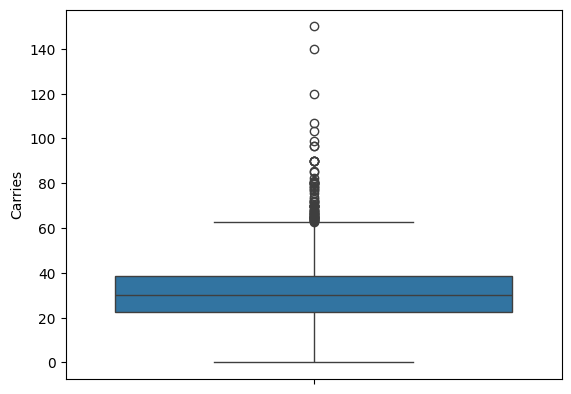

In [ ]:
sns.boxplot(df['Carries'])

In [ ]:
df[df['Player']=='Rodri']['PasBlocks']

2098    0.47
Name: PasBlocks, dtype: float64

<Axes: ylabel='PasBlocks'>

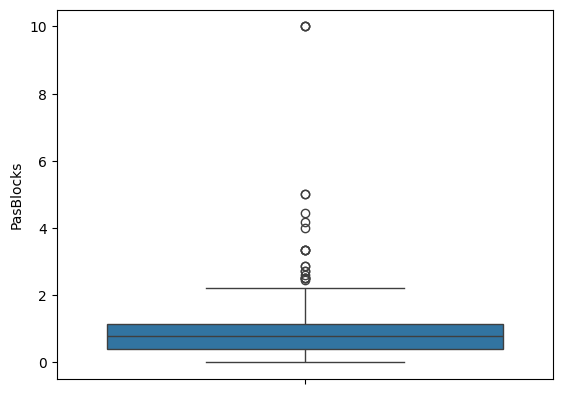

In [ ]:
sns.boxplot(df[df['Pos']=='MF']['PasBlocks'])

In [ ]:
#Cálculo das carcterísticas mais destacadas de determinado jogador com algoritimos de ML -TENTATIVA
def anomalias_isolation_forest_p(jogador, df, features):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[features])
    jogador_scaled = scaler.transform(jogador[features])

    modelo = IsolationForest()
    modelo.fit(df_scaled)
    anomalias = modelo.decision_function(jogador_scaled)
    return anomalias

def anomalias_mcd_p(jogador, df, features):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[features])
    jogador_scaled = scaler.transform(jogador[features])

    modelo = EllipticEnvelope()
    modelo.fit(df_scaled)
    anomalias = modelo.decision_function(jogador_scaled)
    return anomalias

def anomalias_one_class_svm_p(jogador, df, features):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[features])
    jogador_scaled = scaler.transform(jogador[features])

    modelo = OneClassSVM()
    modelo.fit(df_scaled)
    anomalias = modelo.decision_function(jogador_scaled)
    return anomalias

def pontos_anomalos_jogadorN_p(nome_jogador, df):
    jogadores_filtrados, features, dados_jogador = filtragem_pos_clus(nome_jogador, df)
    media_dados = df[features].mean()

    resultados = {}

    anomalias_if = anomalias_isolation_forest_p(jogadores_filtrados, df, features)
    anomalias_mcd_res = anomalias_mcd_p(jogadores_filtrados, df, features)
    anomalias_svm = anomalias_one_class_svm_p(jogadores_filtrados, df, features)

    indices_ordenados_if = np.argsort(anomalias_if)
    indices_ordenados_mcd = np.argsort(anomalias_mcd_res)
    indices_ordenados_svm = np.argsort(anomalias_svm)

    top6_indices_if = indices_ordenados_if[:6]
    top6_indices_mcd = indices_ordenados_mcd[:6]
    top6_indices_svm = indices_ordenados_svm[:6]

    above_average_features_if = [features[i] for i in top6_indices_if if i < len(features) and anomalias_if[i] < media_dados[i]]
    below_average_features_if = [features[i] for i in top6_indices_if if i < len(features) and anomalias_if[i] >= media_dados[i]]

    above_average_features_mcd = [features[i] for i in top6_indices_mcd if i < len(features) and anomalias_mcd_res[i] < media_dados[i]]
    below_average_features_mcd = [features[i] for i in top6_indices_mcd if i < len(features) and anomalias_mcd_res[i] >= media_dados[i]]

    above_average_features_svm = [features[i] for i in top6_indices_svm if i < len(features) and anomalias_svm[i] < media_dados[i]]
    below_average_features_svm = [features[i] for i in top6_indices_svm if i < len(features) and anomalias_svm[i] >= media_dados[i]]

    resultados['Isolation Forest'] = (below_average_features_if, above_average_features_if)
    resultados['Minimum Covariance Determinant (MCD)'] = (below_average_features_mcd, above_average_features_mcd)
    resultados['One-Class SVM'] = (below_average_features_svm, above_average_features_svm)

    return resultados

#Retorna todo o um cluster específico de uma posição a partir de um jogador específico
def filtragem_pos_clus(nome_jogador, df):
    dados_jogador = df[df['Player'] == nome_jogador]

    posicao_jogador = dados_jogador['Pos'].iloc[0]
    cluster_jogador = dados_jogador['Cluster'].iloc[0]

    jogadores_filtrados = df[(df['Pos'] == posicao_jogador) & (df['Cluster'] == cluster_jogador)]
    features = features_por_posicao(posicao_jogador)

    return jogadores_filtrados, features,dados_jogador




#Cálculo dos jogadores mais próximos de um ponto, de acordo com posição de cluster, usando Nearest Neighbors
def calculo_jogadores_recomendados(nome_jogador, df, metric):
    jogadores_filtrados, features, dados_jogador = filtragem_pos_clus(nome_jogador, df)


    scaler = StandardScaler()
    dados_padronizados = scaler.fit_transform(jogadores_filtrados[features])

    nbrs = NearestNeighbors(n_neighbors=10, algorithm="auto", metric=metric)
    nbrs.fit(dados_padronizados)

    dados_jogador_padronizados = scaler.transform(dados_jogador[features])

    distancias, indices = nbrs.kneighbors(dados_jogador_padronizados)

    indices_jogadores_recomendados = indices[0]
    jogadores_recomendados = jogadores_filtrados.iloc[indices_jogadores_recomendados]

    return jogadores_recomendados

#Cálculo das carcterísticas mais destacadas de determinado jogador
def calculo_player_top_features(nome_jogador, df):
    jogadores_filtrados, features, dados_jogador = filtragem_pos_clus(nome_jogador, df)

    scaler = StandardScaler()
    jogadores_filtrados.loc[:, features] = scaler.fit_transform(jogadores_filtrados[features])

    jogador_padronizado = jogadores_filtrados[jogadores_filtrados['Player'] == nome_jogador].iloc[0]

    indices_ordem_crescente = np.argsort(jogador_padronizado[features])

    maiores_caracteristicas = [(features[i], jogador_padronizado[features[i]]) for i in indices_ordem_crescente[-3:]]

    menores_caracteristicas = [(features[i], jogador_padronizado[features[i]]) for i in indices_ordem_crescente[:3]]

    return maiores_caracteristicas, menores_caracteristicas

#Retorno para vizualição das top features
def player_top_features(nome_jogador,df):

  jogadores_filtrados, features, dados_jogador = filtragem_pos_clus(nome_jogador, df)

  top_features,shit_features=calculo_player_top_features(nome_jogador,df)

  tpf = []
  for i,x in top_features:
    tpf.append(i)
  for i,x in shit_features:
    tpf.append(i)

  jogador = jogadores_filtrados[jogadores_filtrados['Player'] == nome_jogador].iloc[0]
  jogador_f = jogador[tpf]
  #As trÊs primeiras são as "melhores" e as três últimas as "piores"
  return jogador_f


In [ ]:
resultados = pontos_anomalos_jogadorN_p('Lionel Messi', df)

for nome_modelo, (above_average_features, below_average_features) in resultados.items():
    print(f"Resultados para o modelo {nome_modelo}:")
    print("Características acima da média de anomalia:")
    print(above_average_features)
    print("Características abaixo da média de anomalia:")
    print(below_average_features)
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-211.237652731558143 > -213.076467052605210). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-178.033422413824127 > -205.159497483899941). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(d

Resultados para o modelo Isolation Forest:
Características acima da média de anomalia:
[]
Características abaixo da média de anomalia:
['ShoDist', 'CPA', 'CarDis', 'Shots', 'Off', 'ScaFld']


Resultados para o modelo Minimum Covariance Determinant (MCD):
Características acima da média de anomalia:
['Car3rd', 'ShoDist', 'PasTotCmp', 'PasAss']
Características abaixo da média de anomalia:
['Shots', 'Off']


Resultados para o modelo One-Class SVM:
Características acima da média de anomalia:
[]
Características abaixo da média de anomalia:
['Car3rd', 'ShoDist', 'Shots', 'CarDis', 'CPA', 'Off']




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 126 entries, Rk to Overall
dtypes: float64(113), int64(8), object(5)
memory usage: 2.6+ MB


In [ ]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Cluster,Overall
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2,3,37.00
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0,3,36.07
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1,5,41.01
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0,4,33.24
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4,8,29.73


In [ ]:
print(df[df['Player']=='Rémy Cabella'])

      Rk        Player Nation   Pos  Squad     Comp  Age  Born  MP  Starts  \
383  384  Rémy Cabella    FRA  MFFW  Lille  Ligue 1   32  1990  16      13   

     ...  TklW  PKwon  PKcon   OG  Recov  AerWon  AerLost  AerWon%  Cluster  \
383  ...  1.65    0.0    0.0  0.0   5.86    0.15     0.83     15.4        7   

     Overall  
383    79.29  

[1 rows x 126 columns]


In [ ]:
#Teste da função com diferentes métricas de cálculo de distância
DISTANCE_METRICS={"cosine","euclidean","chebyshev","minkowski","manhattan","hamming","jaccard"}


for metrica in DISTANCE_METRICS:
  jogadores_recomendados=calculo_jogadores_recomendados('Toni Kroos', df ,metrica)
  print(f"\nJogadores Recomendados usando {metrica}:")
  print(jogadores_recomendados["Player"])




Jogadores Recomendados usando euclidean:
1337          Toni Kroos
2442    Corentin Tolisso
2398     Florian Tardieu
1899       Daniel Parejo
2098               Rodri
258       Nabil Bentaleb
1214     Frenkie de Jong
2252       Stefano Sensi
1897     Leandro Paredes
255      Ismaël Bennacer
Name: Player, dtype: object

Jogadores Recomendados usando manhattan:
1337          Toni Kroos
2098               Rodri
2442    Corentin Tolisso
2398     Florian Tardieu
1214     Frenkie de Jong
1899       Daniel Parejo
258       Nabil Bentaleb
2128      Nicolò Rovella
933        Johan Gastien
1903       Thomas Partey
Name: Player, dtype: object

Jogadores Recomendados usando hamming:
1337            Toni Kroos
2645    Warren Zaire-Emery
206          Pablo Barrios
355       Marcelo Brozovi?
1214       Frenkie de Jong
1899         Daniel Parejo
1588       Pape Matar Sarr
1904         Marco Paali?
1327         Mateo Kova?i?
1898       Leandro Paredes
Name: Player, dtype: object

Jogadores Recomendado

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [ ]:
resultado_maximo, resultado_minimo = calculo_player_top_features('Kevin De Bruyne', df)

print("\nTrês maiores características:")
for feature, valor in resultado_maximo:
    print(f"{feature}: {valor}")

print("\nTrês menores características:")
for feature, valor in resultado_minimo:
    print(f"{feature}: {valor}")


Três maiores características:
ScaPassLive: 1.9735969625819947
GcaPassLive: 2.380321420888965
Assists: 2.8699762443153753

Três menores características:
Recov: -1.0464800353213652
TklDef3rd: -1.0434256811893465
Int: -0.9195073095195271


In [ ]:
result = player_top_features('Kevin De Bruyne',df)
print(result)

ScaPassLive    4.55
GcaPassLive     0.9
Assists        0.62
Recov          3.71
TklDef3rd      0.17
Int            0.22
Name: 612, dtype: object
